In [42]:
# Data Preprocessing
import pandas as pd
import numpy as np
import os

In [43]:
# Function to convert email data to dataframe given folder path containing data
def data_to_df(path):
    # Store list of file_names from specified path
    files = os.listdir(path)
    df = pd.DataFrame({'Email' : np.zeros(len(files))})
    # Add content of email as bytes to Email column
    for i in range(len(files)):
        file_name = path + '/' + files[i]
        with open(file_name, 'rb') as file:
            content = file.read()
        file.close()
        df['Email'][i] = content
    return df

In [44]:
# Create Training DataFrame

# Folder paths containing ham and spam email data
ham_folder_path = '/Users/abhinavmahesh/Documents/Personal Projects/Getting Started with Spam Classification/Training Data/ham'
spam_folder_path = '/Users/abhinavmahesh/Documents/Personal Projects/Getting Started with Spam Classification/Training Data/spam'

# Converting ham and spam data to dataframes
ham_pd = data_to_df(ham_folder_path)
spam_pd = data_to_df(spam_folder_path)

# Labeling 0 for ham and 1 for spam
ham_pd['Label'], spam_pd['Label'] = 0, 1

# Creating a dataframe storing all the data
spam_ham_pd = pd.concat([ham_pd, spam_pd], ignore_index=True)
spam_ham_pd

,Email,Label
0,b'Return-Path: <Online#3.19846.2a-726zgP3UI7kT...,0
1,"b""From rssfeeds@jmason.org Mon Sep 30 13:43:4...",0
2,b'From fork-admin@xent.com Tue Sep 3 14:24:4...,0
3,b'From exmh-users-admin@redhat.com Wed Sep 11...,0
4,b'From fork-admin@xent.com Mon Sep 2 16:22:1...,0
...,...,...
3297,b'From sitescooper-talk-admin@lists.sourceforg...,1
3298,b'From q10bvq9lvq1@prodigy.net Sun Sep 15 12:...,1
3299,b'From vbj101521@caramail.com Tue Aug 27 02:3...,1
3300,b'From biz2biz2446@Flashmail.com Mon Oct 7 2...,1


In [45]:
# Define functions that clean the contents of the email
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Convert email to text
def email_to_text(email):
    # convert to lowercase
    text = email.lower()
    # remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # remove numbers
    text = re.sub(r'[0-9]+', '', text)
    # remove hyperlinks
    text = re.sub(r'http\S+|www\S+', '', text)
    # remove extra newlines
    text = re.sub('\n+', '', text)
    # remove words longer than 35 characters
    text = re.sub(r'[a-z0-9]{35,}', '', text)
    # remove extra whitespace
    text = re.sub('\\s+', ' ', text)
    return text

# Remove stopwords from text
def remove_stopwords(text):
    stopwords_list = stopwords.words('english')
    return ' '.join([word for word in text.split() if word not in stopwords_list])

# Use word lemmatization to further clean text
def lematize(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

In [46]:
import email

# Function to add cleaned text of Subject and Content to dataframe
def text_to_df(df):
    df['Subject'], df['Content'] = None, None
    for i in range(len(df)):
        msg = email.message_from_bytes(df['Email'][i])
        subject = str(msg['Subject'])
        content = ''
        df['Subject'][i] = lematize(remove_stopwords(email_to_text(subject)))
        # handle emails with multiple parts by adding their contents
        if msg.is_multipart():
            for part in msg.walk():
                # if part.get_content_type() == "text/plain":
                #     content += str(part.get_payload(decode=True))
                # if part.get_content_type() == "text/html":
                content += str(part.get_payload(decode=True))
        else:
            # if msg.get_content_type() == "text/plain":
            #     content = str(msg.get_payload(decode=True))
            # if msg.get_content_type() == "text/html":
            content = str(msg.get_payload(decode=True))
        df['Content'][i] = lematize(remove_stopwords(email_to_text(content)))
    return df

In [47]:
# Add cleaned text of Subject and Content to training df
spam_ham_pd = text_to_df(spam_ham_pd)
spam_ham_pd

/var/folders/mm/cqt12vfs6m15tzv8kbj1q7_w0000gn/T/ipykernel_28317/2183761588.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subject'][i] = lematize(remove_stopwords(email_to_text(subject)))
/var/folders/mm/cqt12vfs6m15tzv8kbj1q7_w0000gn/T/ipykernel_28317/2183761588.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content'][i] = lematize(remove_stopwords(email_to_text(content)))


,Email,Label,Subject,Content
0,b'Return-Path: <Online#3.19846.2a-726zgP3UI7kT...,0,newscom investor battered stock regain ground,bhtmlnheadntitlecnet investor dispatchtitlenhe...
1,"b""From rssfeeds@jmason.org Mon Sep 30 13:43:4...",0,priceless rubens work stolen raid mansion,burl tnnarts fourth art raid philanthropist ho...
2,b'From fork-admin@xent.com Tue Sep 3 14:24:4...,0,making mesh move,bn mesh movenna new way give u fast mobile net...
3,b'From exmh-users-admin@redhat.com Wed Sep 11...,0,sorting,b youre probably running exmh local machine im...
4,b'From fork-admin@xent.com Mon Sep 2 16:22:1...,0,java kiddy,bon sun sep reza bfar ebuilt wrotenn c c force...
...,...,...,...,...
3297,b'From sitescooper-talk-admin@lists.sourceforg...,1,scoop haberdar olun,bhaberdarcom haber medya portalinartxfdk txfcm...
3298,b'From q10bvq9lvq1@prodigy.net Sun Sep 15 12:...,1,tax problem,bnhtmlheadtitletitleheadbody bgcolorwhitentabl...
3299,b'From vbj101521@caramail.com Tue Aug 27 02:3...,1,custom website complete,bdoctype html public wcdtd html website comple...
3300,b'From biz2biz2446@Flashmail.com Mon Oct 7 2...,1,see company sale sky rocket,bthere stumbling nnthe greatest way marketing ...


<AxesSubplot: ylabel='Label'>

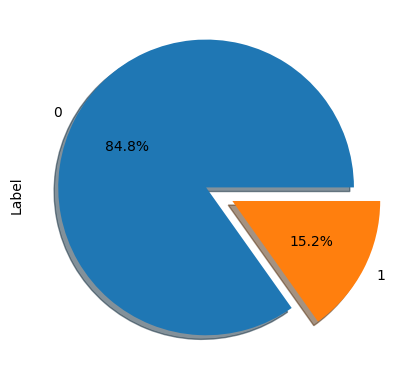

In [48]:
# Save training df as csv file
spam_ham_pd.to_csv(f"Training Data/training_spam_ham_data.csv", index = False)

# Plot pie chart of data
spam_ham_pd.Label.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.1,0.1])

In [49]:
# Create Testing DataFrame

# Folder paths containing ham and spam email data
test_ham_folder_path = '/Users/abhinavmahesh/Documents/Personal Projects/Getting Started with Spam Classification/Testing Data/ham'
test_spam_folder_path = '/Users/abhinavmahesh/Documents/Personal Projects/Getting Started with Spam Classification/Testing Data/spam'

# Converting ham and spam data to dataframes
test_ham_pd = data_to_df(test_ham_folder_path)
test_spam_pd = data_to_df(test_spam_folder_path)

# Labeling 0 for ham and 1 for spam
test_ham_pd['Label'], test_spam_pd['Label'] = 0, 1

# Creating a dataframe storing all the data
test_spam_ham_pd = pd.concat([test_ham_pd, test_spam_pd], ignore_index=True)
test_spam_ham_pd

,Email,Label
0,b'From fork-admin@xent.com Tue Sep 24 17:55:3...,0
1,b'From rpm-list-admin@freshrpms.net Mon Sep ...,0
2,b'From secprog-return-625-jm=jmason.org@securi...,0
3,b'From fork-admin@xent.com Thu Aug 29 11:03:5...,0
4,b'From spamassassin-talk-admin@lists.sourcefor...,0
...,...,...
2985,b'From adcilt8018n07@msn.com Mon Sep 2 16:26...,1
2986,b'Received: from qrq.cc.ntu.edu.tw (giga.tw.fr...,1
2987,b'From rxwi506@framesetup.com Wed Aug 28 10:4...,1
2988,b'From christinezenker@hotmail.com Mon Sep 2...,1


In [50]:
# Add cleaned text of Subject and Content to testing df
test_spam_ham_pd = text_to_df(test_spam_ham_pd)
test_spam_ham_pd

/var/folders/mm/cqt12vfs6m15tzv8kbj1q7_w0000gn/T/ipykernel_28317/2183761588.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subject'][i] = lematize(remove_stopwords(email_to_text(subject)))
/var/folders/mm/cqt12vfs6m15tzv8kbj1q7_w0000gn/T/ipykernel_28317/2183761588.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content'][i] = lematize(remove_stopwords(email_to_text(content)))


,Email,Label,Subject,Content
0,b'From fork-admin@xent.com Tue Sep 24 17:55:3...,0,liberal defnitions,bnin message dated jamesrbestcom writesnnthis ...
1,b'From rpm-list-admin@freshrpms.net Mon Sep ...,0,problem apt update,bhiya always seem get error apt update nproble...
2,b'From secprog-return-625-jm=jmason.org@securi...,0,bad developer library problem software,bni dont know one expect better secure code th...
3,b'From fork-admin@xent.com Thu Aug 29 11:03:5...,0,gecko adhesion finally sussed,bat jim whitehead wrotennn great half id need ...
4,b'From spamassassin-talk-admin@lists.sourcefor...,0,satalk bayesian bogofilter,banyway im making good progress implementation...
...,...,...,...,...
2985,b'From adcilt8018n07@msn.com Mon Sep 2 16:26...,1,want sex ocytuccuggcz,linkffff vlinkffff alinkffff textffff bgcolor ...
2986,b'Received: from qrq.cc.ntu.edu.tw (giga.tw.fr...,1,best,bhtmlnheadnmeta contenttexthtml charseteuckrnt...
2987,b'From rxwi506@framesetup.com Wed Aug 28 10:4...,1,mother want fuck,bhtmlheadtitlemilfhuntertitlenmeta charsetwind...
2988,b'From christinezenker@hotmail.com Mon Sep 2...,1,attn norton systemworks blowout qhzhc,bhtmlnnheadnmeta contentenusnmeta contenttexth...


<AxesSubplot: ylabel='Label'>

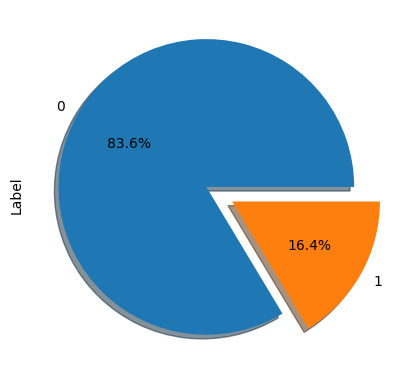

In [51]:
# Save testing df as csv file
test_spam_ham_pd.to_csv(f"Testing Data/testing_spam_ham_data.csv", index = False)

# Plot pie chart of data
test_spam_ham_pd.Label.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.1,0.1])

In [54]:
# Feature Extraction
# Tfidf(Term Frequency * Inverse Document Frequency) used to transform data
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data into train and test set

# Categorize x and y variables
x_train = spam_ham_pd.Content
y_train = spam_ham_pd.Label
x_test = test_spam_ham_pd.Content
y_test = test_spam_ham_pd.Label

# Create instance of vectorizer
vectorizer = TfidfVectorizer()

# tokenize and build vocab by fitting the training data and then transforming it into a feature extraction layer
x_train = vectorizer.fit_transform(x_train)

# Only transform the testing data to predict the labels for it later
x_test = vectorizer.transform(x_test)

In [58]:
# Model training (Training Classifier = GaussianNB)
# ML Algorithm used for prediction is a Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

# Create an instance of the model
clf = GaussianNB()

# Train the model using training data x
clf.fit(x_train.toarray(), y_train)

# Returns an array predicting whether the testing data is spam (1) or ham (0) based on the testing data
prediction_labels = clf.predict(x_test.toarray())

# Output of the score is the accuracy of the prediction
# accuracy of training data
print("Accuracy of Training Data Prediction is " + str(clf.score(x_train.toarray(), y_train) * 100) + "%.")

# accuracy of testing data
print("Accuracy of Testing Data Prediction is " + str(clf.score(x_test.toarray(), y_test) * 100) + "%.")


Accuracy of Training Data Prediction is 99.96971532404604%.
Accuracy of Testing Data Prediction is 99.83277591973244%.


In [59]:
# Add columns displaying predicted labels and whether it's a match or not
test_spam_ham_pd = pd.concat([test_spam_ham_pd.drop("Label", axis=1), test_spam_ham_pd["Label"]], axis=1)
test_spam_ham_pd["Predicted Label"] = pd.DataFrame(prediction_labels, columns=["Predicted Label"])
test_spam_ham_pd["Match"] = (test_spam_ham_pd["Predicted Label"] == test_spam_ham_pd["Label"])
test_spam_ham_pd

,Email,Subject,Content,Label,Predicted Label,Match
0,b'From fork-admin@xent.com Tue Sep 24 17:55:3...,liberal defnitions,bnin message dated jamesrbestcom writesnnthis ...,0,0,True
1,b'From rpm-list-admin@freshrpms.net Mon Sep ...,problem apt update,bhiya always seem get error apt update nproble...,0,0,True
2,b'From secprog-return-625-jm=jmason.org@securi...,bad developer library problem software,bni dont know one expect better secure code th...,0,0,True
3,b'From fork-admin@xent.com Thu Aug 29 11:03:5...,gecko adhesion finally sussed,bat jim whitehead wrotennn great half id need ...,0,0,True
4,b'From spamassassin-talk-admin@lists.sourcefor...,satalk bayesian bogofilter,banyway im making good progress implementation...,0,0,True
...,...,...,...,...,...,...
2985,b'From adcilt8018n07@msn.com Mon Sep 2 16:26...,want sex ocytuccuggcz,linkffff vlinkffff alinkffff textffff bgcolor ...,1,1,True
2986,b'Received: from qrq.cc.ntu.edu.tw (giga.tw.fr...,best,bhtmlnheadnmeta contenttexthtml charseteuckrnt...,1,1,True
2987,b'From rxwi506@framesetup.com Wed Aug 28 10:4...,mother want fuck,bhtmlheadtitlemilfhuntertitlenmeta charsetwind...,1,1,True
2988,b'From christinezenker@hotmail.com Mon Sep 2...,attn norton systemworks blowout qhzhc,bhtmlnnheadnmeta contentenusnmeta contenttexth...,1,1,True


<AxesSubplot: ylabel='Predicted Label'>

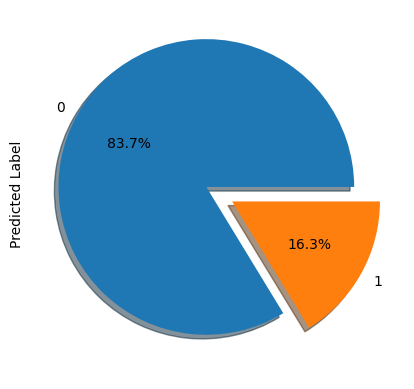

In [65]:
# Save predicted df as csv file
test_spam_ham_pd.to_csv("predicted_spam_ham_data.csv", index = False)

# Plot pie chart of data with predicted labels
test_spam_ham_pd["Predicted Label"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.1,0.1])

In [66]:
# Additoinal Metrics
matches = len(test_spam_ham_pd[test_spam_ham_pd.Match == True])
mismatches = len(test_spam_ham_pd[test_spam_ham_pd.Match == False])
print("Number of matches in testing dataset is " + str(matches))
print("Number of mismatches in testing dataset is " + str(mismatches))

Number of matches in testing dataset is 2985
Number of mismatches in testing dataset is 5
